In [159]:
import json
import pandas as pd
import numpy as np
from numpy import nan
from gensim.models.wrappers import LdaMallet
from gensim.corpora.dictionary import Dictionary
import os
import re
from datetime import date
import math
from collections import Counter
from sklearn.model_selection import train_test_split
from seaborn import barplot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import urllib.request
from urllib.parse import quote

In [2]:
with open('data_new.txt', 'r', encoding='utf-8') as f:
    tmp_ = json.load(f)

In [19]:
cities1 = new['cities1']
cities2 = new['cities2']

In [38]:
X = StandardScaler().fit_transform(new.drop('target', axis=1))
y = new['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [363]:
nn = MLPClassifier(alpha=1)
nn.fit(X_train, y_train)
probs = nn.predict_proba(X_test)

In [398]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
probs = rf.predict_proba(X_test)

In [399]:
dct = []
i = 0
for key, value in y_test.items():
    dct.append([cities1[key], cities2[key], probs[i], value])
    i += 1

In [400]:
for i, elem in enumerate(dct):
    dct[i][2] = list(elem[2])

In [401]:
dct[0]

[1506659, 1506659, [0.40000000000000002, 0.59999999999999998], 1]

In [78]:
st = set()
for elem in cities1:
    if elem not in st:
        st.add(elem)
for elem in cities2:
    if elem not in st:
        st.add(elem)

{0,
 1,
 2,
 1507329,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 1146921,
 44,
 45,
 46,
 1114153,
 1114160,
 49,
 50,
 51,
 52,
 1507379,
 54,
 55,
 56,
 57,
 1507386,
 59,
 60,
 61,
 62,
 58,
 64,
 65,
 66,
 63,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 1146950,
 78,
 79,
 80,
 81,
 82,
 83,
 1507408,
 85,
 86,
 87,
 88,
 1048593,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 1048685,
 112,
 113,
 114,
 111,
 116,
 117,
 115,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 1507448,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 1802375,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 1507476,
 153,
 154,
 152,
 156,
 157,
 158,
 159,
 160,
 161,
 155,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 1507495,
 171,
 172,
 173,
 174,
 175,
 

In [149]:
ids = [str(elem) for elem in st] # заведём массив с нужным числом отсутпов
offsets = [int(i * 250) for i in range(len(ids) // 250 + 1)] # заведём массив с нужным числом отсутпов

In [190]:
key = '099d9696099d9696099d96967a09ffdc410099d099d96965357a63d615a97ea025c229e'

In [ ]:
cities_ = dict()
for offset in offsets:
    req = urllib.request.Request('https://api.vk.com/method/database.getCitiesById?city_ids={}&lang=en&v=5.78&access_token={}'.format(','.join(ids[offset:offset + 250]), key)) #', '.join(ids[offset:offset + 1000])
    response = urllib.request.urlopen(req)
    result = response.read().decode('utf-8')
    result = json.loads(result)['response']
    for elem in result:
        cities_[elem['id']] = elem['title']

In [ ]:
with open('chess\\cities_.j')

In [167]:
cities = dict()

In [168]:
key='fe2acf718694404a92a8d9977d24f9d6'

In [ ]:
coords = dict()

In [208]:
i = 0
for key, value in cities_.items():
    if key in coords:
        continue
    print(i, value)
    req = urllib.request.Request('http://latitudelongitude.org/ru/' + '-'.join(value.lower().split()) + '/')
    try:
        response = urllib.request.urlopen(req)
    except:
        print('!!!')
        continue
    result = response.read().decode('utf-8')
    latlng = re.findall('lat-long coordinates are (.*?)\">', result)
    if len(latlng) == 0:
        print('!!!')
        continue
    else:
        latlng = latlng[0]
    coords[key] = latlng.split(', ')
    i += 1

0 Marinovka
!!!
0 Otradnoe
!!!
0 Chop
!!!
0 Buenos Aires
!!!
0 Borok
!!!
0 Astana
!!!
0 Torino
!!!
0 Blagoveschensk
!!!
0 Velikie Luki
!!!
0 Vidnoe
!!!
0 Volzhsky
!!!
0 Shygyrdan
!!!
0 Azim-Sirma
!!!
0 Elabuga
!!!
0 Elets
!!!
0 Essentuki
!!!
0 Borislav
!!!
0 Brody
!!!
0 Joshkar-Ola
!!!
0 Karachaevsk
!!!
0 Komsomolsk-na-Amure
!!!
0 Novosultangulovo
!!!
0 Podkamen
!!!
0 Naberezhnye Chelny
!!!
0 Bolshaya Ivanovka
!!!
0 Nizhny Novgorod
!!!
0 Oryol
!!!
0 Orekhovo-Zuevo
!!!
0 Persianovsky
!!!
0 Ramenskoe
!!!
0 Puschino
!!!
0 Rostov-on-Don
!!!
0 Ruzaevka
!!!
0 Sokoly
!!!
0 Siversky
!!!
0 Miami
!!!
0 Komarno
!!!
0 Chaykovsky
!!!
0 Cheboxary
!!!
0 Grozny
!!!
0 Cherlyany
!!!
0 Baikonur
!!!
0 Bayreuth
!!!
0 Vinniki
!!!
0 Dobrogostov
!!!
0 Novoe Churashevo
!!!
0 Plyussa
!!!
0 Almaty
!!!
0 Voroblevichi
!!!
0 Sevastopol
!!!
0 Ivana-Franka
!!!
0 Medenichi
!!!
0 Ulaanbaatar
!!!
0 Tashkent
!!!
0 Novy Kropivnik
!!!
0 Wien
!!!
0 Alexandrovskoe
!!!
0 Rikhtichi
!!!
0 Bishkek
!!!
0 Oskemen
!!!
0 Podbuzh
!!!

!!!
146 Radun
!!!
146 Kokshetau
!!!
146 Saruy
!!!
146 Egoryevsk
!!!
146 Falish
!!!
146 Pavelets
!!!
146 Kryvyi Rih
!!!
146 Lokomotivny
!!!
146 Tetyushi
147 Ashkhabad
!!!
147 Ilnik
!!!
147 Maardu
!!!
147 Karpatskoe
!!!
147 Paldiski
!!!
147 Libokhora
!!!
147 Matkov
!!!
147 Zyryanovsk
!!!
147 Nizhnee Vysotskoe
!!!
147 Ozersk
148 Nizhnyaya Yablonka
!!!
148 Prislip
!!!
148 Jõhvi
!!!
148 Cherdyn
149 Kohtla-Järve 
!!!
149 Turka
!!!
149 Ozherelye
150 Kiviõli
!!!
150 Syzran
151 Bălţi 
!!!
151 Narva
!!!
151 Arendal
!!!
151 Sillamäe
!!!
151 Barcelona
!!!
151 Maysky
!!!
151 Sosnovka
152 Staronizhesteblievskaya
!!!
152 Kurovskoe
!!!
152 Novomoskovsk
153 Mustvee
!!!
153 Verblyany
!!!
153 Roslavl
154 Vizhomlya
!!!
154 Rotterdam
!!!
154 Samarkand
!!!
154 Drogomishl
!!!
154 Dubrovitsa
!!!
154 Zavadov
!!!
154 Zaluzhye
!!!
154 Tazovsky
!!!
154 Ivano-Frankovo
!!!
154 Yuzhny
!!!
154 Melbourne
!!!
154 Lod
!!!
154 Krakovets
!!!
154 Haapsalu (Khaapsalu)
!!!
154 Malchitsy
!!!
154 Mozhaysk
155 Muzhilovichi
!!!


!!!
303 Krāslava
!!!
303 Pisarevka
!!!
303 Chernyanka
304 Mineralnye Vody
305 Staritsa
306 Privolzhsky
!!!
306 Vorsma
307 Yuchka
!!!
307 Bogodukhov
!!!
307 Leninsk-Kuznetsky
308 Dobroslav / Kominternovskoe
!!!
308 Kotelnikovo
309 Novokubansk
310 Uvarovo
311 Lesozavodsk
312 Darasun
313 Ushtobe
!!!
313 Vytegra
314 Dibrovka
!!!
314 Ploskosh
!!!
314 Selenginsk
!!!
314 Vilovatovo
!!!
314 Dalnegorsk
315 Priluki
!!!
315 Khovu-Axy
!!!
315 Novokrasnoe
!!!
315 Novosamarka
!!!
315 Stavrovo
316 Khandyga
317 Antipayuta
!!!
317 Yadrin
318 Yakhroma
319 Bolshaya Sosnova
!!!
319 Borisoglebsky
!!!
319 Staraya Ladoga
!!!
319 Zelenogorskoe
!!!
319 Lyubashevka
!!!
319 North Miami Beach
!!!
319 Wojnicz
!!!
319 Poznanka Pervaya
!!!
319 Pokrovka
320 Soltanovka
!!!
320 Troitskoe
!!!
320 Shaytanka
!!!
320 Yasenovo Vtoroe
!!!
320 Dnestrovsk
!!!
320 Alexeevka
!!!
320 Chulym
321 Antonyuki
!!!
321 Severo-Eniseysky
!!!
321 Snov
!!!
321 Levadovka
!!!
321 Isaevo
!!!
321 Kansk
322 Moroskino
!!!
322 Nikolskoe
!!!
322 Au

!!!
432 Devlezerkino
!!!
432 Marmaris
!!!
432 Goroshinoe
!!!
432 Białystok
!!!
432 Bodrum
!!!
432 Matveevka
!!!
432 Osinniki
433 Krivaya Ruda
!!!
433 Ocheretovatoe
!!!
433 Vavozh
434 Semenovka
!!!
434 Speightstown
!!!
434 Volokov Most
!!!
434 Porto-Novo
!!!
434 Hamilton
!!!
434 Dubno
!!!
434 Razdolye
!!!
434 Montero
!!!
434 Doboj
!!!
434 Kovali
!!!
434 Depo
!!!
434 Ob
435 Valencia
!!!
435 Pokrovskaya Bagachka
!!!
435 Oslo
!!!
435 Savinsky
!!!
435 Staroavramovka
!!!
435 Axakovo
!!!
435 Shishaki
!!!
435 Pinar del Río
!!!
435 Zugres
!!!
435 Roshal
436 Belousovka
!!!
436 Belovo
437 Voronki
!!!
437 Cần Thơ
!!!
437 Goltsy
!!!
437 Malé
!!!
437 Libreville
!!!
437 Cap-Haïtien
!!!
437 Lugoviki
!!!
437 Ust-Kut
438 Melekhi
!!!
438 Rovenki
!!!
438 Kumasi
!!!
438 Poznyaki
!!!
438 Kharsiki
!!!
438 Chernukhi
!!!
438 Basse-Terre
!!!
438 Skorokhodovo / Artemovka
!!!
438 Romanovka
439 Tela
!!!
439 Stolbovaya
440 Zelenogradsk
441 Baxan
!!!
441 Chishmy
442 Livingstone
!!!
442 Manturovo
443 Chetyrla
!!!
443

526 Ryazhsk
527 Limón
!!!
527 Abasha
!!!
527 Khulimsunt
!!!
527 Mariupol
!!!
527 Omutninsk
528 Postnikovo
!!!
528 Andra
!!!
528 Vinnitsa
!!!
528 Korsun-Shevchenkovsky
!!!
528 Spasskoe / Leninskoe
!!!
528 Zelenokumsk
529 Kirovsky
!!!
529 Alnashi
530 Tuligolovoe
!!!
530 Schuchin
!!!
530 Nizhegorody
!!!
530 Velikovo
!!!
530 Lesozavodsky
!!!
530 Balakirevo
531 Krasny Kut
!!!
531 Belousovka
!!!
531 Nikolsk
532 Volgodonsk
533 Komsomolsky
!!!
533 Kurgan
534 Mezhirich
!!!
534 Shtepovka
!!!
534 Kysyl-Syr
!!!
534 Bayrak
!!!
534 Kamenny Yar
!!!
534 Sandovo
!!!
534 Lipovaya Dolina
!!!
534 Kozmodemyansk
535 Malinovsky
!!!
535 Panasovka
!!!
535 Shagonar
536 Vichuga
537 Rusanovka
!!!
537 Novoselitskoe
!!!
537 Kalush
!!!
537 Besedovka
!!!
537 Gadyach
!!!
537 Andorra la Vella
!!!
537 Korovintsy
!!!
537 Kuleshovka
538 Mozdok
539 Khvalynsk
540 Kharp
541 Nedrigaylov
!!!
541 Terny
!!!
541 Kakhovka
!!!
541 Komsomolskoe
!!!
541 Psebay
542 Plovdiv
!!!
542 Solonets 1
!!!
542 Kuzemin
!!!
542 Kotelniki
543 Rekor

!!!
633 Lvovka
!!!
633 Krupki
!!!
633 Pavlovskiy Posad
634 Stepovoe
!!!
634 Perevesinka
!!!
634 Kapan
!!!
634 Staraya Sinyava
!!!
634 Guty
!!!
634 Ketovo
635 Kamakura
!!!
635 Alagir
636 Torbeevo
!!!
636 Boguslavka
!!!
636 Borovaya
!!!
636 Vysshaya Solenoe
!!!
636 Derevyanka
!!!
636 Bogdanovich
637 Novolukoml
!!!
637 Pervomayskoe
!!!
637 Kovyagi
!!!
637 Medina
!!!
637 Dukhovschina
!!!
637 Torez
!!!
637 Sidorenkovo
!!!
637 Kolchugino
638 Kataysk
639 Sharovka
!!!
639 Velikiy Burluk
!!!
639 Rogovskaya
640 Kotelnoe
!!!
640 Bokhan
641 Sergino
!!!
641 Siva
!!!
641 Kingstown
!!!
641 Krasny Yar
!!!
641 Obozersky
!!!
641 Bely Kolodez
!!!
641 Zarechye
642 Ürümqi
!!!
642 Shakhovskaya
643 Gremyachinsk
644 Uzgen
!!!
644 Odintsovo
645 Kalach
646 Muzhi
!!!
646 Stary Saltov
!!!
646 Semikarakorsk
647 Khodzheyli
!!!
647 Velikiy Vyselok
!!!
647 Bogdanovskoe / Zhovtnevoe
!!!
647 Jinja
!!!
647 Nikologory
648 Lubny
!!!
648 Avdeevka
!!!
648 Tavolzhanka
!!!
648 Terny
!!!
648 Novy Svet
!!!
648 Dergachi
649 Kras

!!!
737 Dunaevtsy selo
!!!
737 Guantánamo
!!!
737 Makov
!!!
737 Kalevala
738 Mitsovtsy
!!!
738 Guangzhou
!!!
738 Shumerlya
739 Smotrich
!!!
739 Shilka
740 Ternovaya
!!!
740 Ladyzhin
!!!
740 Kyshtym
741 Chankov
!!!
741 Tinna
!!!
741 Belogorodka
!!!
741 Barvikha
!!!
741 Borisov
!!!
741 Velikaya Radogosch
!!!
741 Demidov
742 Dvorets
!!!
742 Pluzhnoe
!!!
742 Priputni
!!!
742 Sakhnovtsy
!!!
742 Osnabrück
!!!
742 Grand Forks
!!!
742 Vrublovtsy
!!!
742 Pokrovka
743 Michurinskoe
!!!
743 Gumentsy
!!!
743 Bazarny Syzgan
!!!
743 Zhvanets
!!!
743 Stroitel
744 Balakhna
!!!
744 Stroitel
745 Alexandrovsk-Sakhalinsky
!!!
745 Orinin
!!!
745 Bichura
746 Staraya Ushitsa
!!!
746 Krolevets
!!!
746 Namur
!!!
746 Zhukovka
747 Antoniny
!!!
747 Oryol
!!!
747 Trubchevsk
748 Glebki
!!!
748 Aktanysh
749 Kremenchuki
!!!
749 Dobrich
!!!
749 Varna
750 Kulchinki
!!!
750 Kulchini
!!!
750 Lagodintsy
!!!
750 Yalutorovsk
751 Moskovsky
!!!
751 Manovtsy
!!!
751 Sergeevka
!!!
751 Sovetsky
!!!
751 Razdelnaya
!!!
751 Ridder
!

!!!
828 Chernobay
!!!
828 Preobrazhenie
!!!
828 Vasilkov
!!!
828 Sudak
!!!
828 Zhuravka
!!!
828 Energetik
829 Yuzhno-Kurilsk
830 Uglegorsk
831 Maryanovka
!!!
831 Elnya
!!!
831 Butovo
!!!
831 Jaunolaine
!!!
831 Pyschug
!!!
831 Ivye
!!!
831 Beregomet
!!!
831 Beirut
!!!
831 Vashkovtsy
!!!
831 Velikoe
!!!
831 Vizhnitsa
!!!
831 Zamostya
!!!
831 Ispas
!!!
831 Karapchov
!!!
831 Bolshoy Ray
!!!
831 Korytnoe
!!!
831 Lukovtsy
!!!
831 Migovo
!!!
831 Milievo
!!!
831 Chereshenka
!!!
831 Chernoguzy
!!!
831 Zhiloy Massiv Zima
!!!
831 Muromtsevo
832 Gertsa
!!!
832 Molnitsa
!!!
832 Petrashovka
!!!
832 Karaga
!!!
832 East Grand Forks
!!!
832 Glubokaya
!!!
832 Dimka
!!!
832 Kamenka
833 Karapchov
!!!
833 Petropavlovsk
!!!
833 Kupka
!!!
833 Boklan
!!!
833 Oprisheny
!!!
833 Granada
!!!
833 Tereblechye
!!!
833 Chagor
!!!
833 Novoselovo
!!!
833 Vasilyev
!!!
833 Klevakino
!!!
833 Verenchanka
!!!
833 Kostino
!!!
833 Zvenyachin
!!!
833 Kostroma
834 Kostrizhovka
!!!
834 Kadubovtsy
!!!
834 Novaya Shulba
!!!
834 Kh

!!!
891 Priobye
892 Adelaide
!!!
892 Belozerskoe
!!!
892 Piastów
!!!
892 Vorobyevka
!!!
892 Kurya
!!!
892 Vorovskogo
!!!
892 Kamenka
893 Lugovskoy
!!!
893 Savinovo
!!!
893 Opole
!!!
893 Artsiz
!!!
893 Sevan
!!!
893 Cahul
!!!
893 Plzeň
!!!
893 Polessk
894 České Budějovice
!!!
894 Borovoe
!!!
894 Gornyak
895 Verkh-Neyvinsky
!!!
895 Vysokoe
!!!
895 Abatskoe
!!!
895 Obukhovo
896 Vasilkovka
!!!
896 Arkalyk
!!!
896 Lübeck
!!!
896 Nizhniy Karachan
!!!
896 Krasnograd
!!!
896 Polyana
!!!
896 Kiryat Ata
!!!
896 Dolgoderevenskoe
!!!
896 Fryazevo
897 Khrapunovo
!!!
897 Atig
!!!
897 Irkutsky
!!!
897 Malinovoe Ozero
!!!
897 Galbshtadt
!!!
897 Xi'an
!!!
897 Kusak
!!!
897 Nizhnie Sergi
!!!
897 Shumanovka
!!!
897 Pokrovsk / Krasnoarmeysk
!!!
897 Pomozdino
!!!
897 Houston
!!!
897 Butyn
!!!
897 Pripolyarny
!!!
897 Ventspils
!!!
897 Novichikha
!!!
897 Shokurovo
!!!
897 Bydgoszcz
!!!
897 Pervomaysky
!!!
897 Gorlovka
!!!
897 Neftegorsk
898 Furmanov
899 Novye zori
!!!
899 Novoanninsky
!!!
899 Benevento
!!!
8

!!!
1001 Texas City
!!!
1001 Pinega
!!!
1001 Oulu
!!!
1001 Stavropolsky
!!!
1001 Torgashino
!!!
1001 Tsagatuy
!!!
1001 Valencia
!!!
1001 Ergi-Barlyk
!!!
1001 Iyme
!!!
1001 Khondergey
!!!
1001 Ust-Egita
!!!
1001 Chadan
1002 Kurumoch
1003 Shemi
!!!
1003 Oktyabrsk
!!!
1003 Avygan
!!!
1003 Gorkhon
!!!
1003 Obilnoe
!!!
1003 Boyarovka
!!!
1003 Gulistan
!!!
1003 Saryg-Sep
!!!
1003 Kubachi
!!!
1003 Stepnoy
!!!
1003 Naryn-Atsagat
!!!
1003 Novoilinsk
!!!
1003 Kiryat Bialik
!!!
1003 Onokhoy
1004 Mayya
1005 Fagatogo
!!!
1005 Sagly
!!!
1005 Sankt Gallen
!!!
1005 Chelutay (3 km)
!!!
1005 Arzhaan
!!!
1005 Shabur
!!!
1005 Novotroitskaya
1006 Turan
1007 Velikent
!!!
1007 Skvortsovo
!!!
1007 Aldan-Maadyr
!!!
1007 Ishkin
!!!
1007 Sug-Axy
!!!
1007 Burukshun
!!!
1007 Aleppo
!!!
1007 Ditva
!!!
1007 Urussu
1008 Ukholovo
1009 Ganzurino
!!!
1009 Chuchkovo
!!!
1009 Ak-Erik
!!!
1009 Bert-Dag
!!!
1009 Samagaltay
!!!
1009 Shemetovo
!!!
1009 Orongoy (ulus)
!!!
1009 Logoysk
!!!
1009 Liman
1010 Novoselenginsk
!!!
101

!!!
1104 Romanovo
1105 Solnechny
!!!
1105 Ardatov
1106 Slavuta
!!!
1106 Barysh
1107 De-Kastri
!!!
1107 Lutovenka
!!!
1107 Tsimmermanovka
!!!
1107 Zaysan
!!!
1107 Kestenga
!!!
1107 Ovruch
!!!
1107 Luza
1108 Shanghai
!!!
1108 Turochak
1109 Larnaca
!!!
1109 Korsakovo
!!!
1109 Ivankov
!!!
1109 Yushala
!!!
1109 Malyshevo
!!!
1109 Altay
!!!
1109 Arshanovo
!!!
1109 Bely Yar
!!!
1109 Berezovka
1110 Dubrovka
1111 Im Stepana Razina
!!!
1111 Kirovo
!!!
1111 Lukyanovka
!!!
1111 Losinovka
!!!
1111 Balyxa
!!!
1111 Sarkand
!!!
1111 Katanov
!!!
1111 Kueda (poselok)
!!!
1111 Bergamo
!!!
1111 Nikolsky
!!!
1111 Strachanka
!!!
1111 Tulinovka
!!!
1111 Zharneli
!!!
1111 Bolshoy Monok
!!!
1111 Khazar
!!!
1111 Sofia
!!!
1111 Krasnaya Polyana
1112 Carcavelos
!!!
1112 Pesaro
!!!
1112 Ostrozhka
!!!
1112 Bolshaya Erba
!!!
1112 Berezniki
1113 Znamenka
1114 Karasuk
1115 Sambor
!!!
1115 Navoloki
1116 Dobrush
!!!
1116 Buzdyak
1117 Komsomolsk
1118 Borovskoy
!!!
1118 Pola
!!!
1118 Imek
!!!
1118 Ryzhkovo
!!!
1118 Malye 

!!!
1210 Choya
!!!
1210 Angren
!!!
1210 Igmas
!!!
1210 Vakhovsk
!!!
1210 Pushkari
!!!
1210 Nikolaevka
!!!
1210 Shklo
!!!
1210 Molkeevo
!!!
1210 Saraktash
1211 Freeport
!!!
1211 Privolye
!!!
1211 Vyezdnoe
!!!
1211 Staroderevyankovskaya
1212 Chuteevo
!!!
1212 Pestovo
1213 Lyubimovka
!!!
1213 Alanya
!!!
1213 Topoli
!!!
1213 Troitskoe
!!!
1213 Radomyshl
!!!
1213 Voronovitsa
!!!
1213 Karlovka
!!!
1213 Mishelevka
1214 Punta Arenas
!!!
1214 Novozhilkino
!!!
1214 Road Town
!!!
1214 Chelny
!!!
1214 Puerto Varas
!!!
1214 Berlin
!!!
1214 Cockburn Town
!!!
1214 Mordino
!!!
1214 Guadalajara
!!!
1214 Akyar
1215 Ermakovskoe
!!!
1215 Ozinki
!!!
1215 Nizhnyaya Sinyachikha
!!!
1215 Vacha
1216 Lubyany
!!!
1216 Komarovka
!!!
1216 Mamashir
!!!
1216 Podvolochnoe
!!!
1216 Novoshakhtinsky
!!!
1216 Goscha
!!!
1216 Zilupe
!!!
1216 Nakvasha
!!!
1216 Voskresenskoe
!!!
1216 Verkhnyaya Iret
!!!
1216 Foros
!!!
1216 Talnoe
!!!
1216 Pervomaysk
1217 Stavische
!!!
1217 Balagansk
!!!
1217 Plesetsk
1218 Kamenno-Angarsk
!!

!!!
1304 Timashevo
!!!
1304 Serdobsk
1305 Pryazha
!!!
1305 Arkhangelskoe
!!!
1305 Kozlovka
1306 Shirvan
!!!
1306 Bely
!!!
1306 Chernukha
!!!
1306 Gavrilov Posad
1307 Duminichi
1308 Nikolaevka
!!!
1308 Parabel
1309 Kabansk
1310 Khomutovo
!!!
1310 Kalanchak
!!!
1310 Kosino
!!!
1310 Verkhnie Sergi
!!!
1310 Taldan
!!!
1310 Mukhino
!!!
1310 Ko Samui
!!!
1310 Sétif
!!!
1310 Vetluga
1311 Zhizdra
1312 Lyubytino
!!!
1312 Barcelona
!!!
1312 Barcelona
!!!
1312 Acerra
!!!
1312 Korsakovo
!!!
1312 Mladensk
!!!
1312 Svyatogorsk
!!!
1312 Bor
1313 Torgau
!!!
1313 Polyudovo
!!!
1313 Tuxa
!!!
1313 Goncharka
!!!
1313 Selyatino
1314 Vysokovsk
1315 Ostróda
!!!
1315 Belousovo
1316 Buribay
!!!
1316 Bukhlovka
!!!
1316 Krasnaya Zarya
!!!
1316 Bolshoy Porek
!!!
1316 Port-of-Spain
!!!
1316 Kuzhenkino
!!!
1316 Maysky
!!!
1316 Kallithea
!!!
1316 México
!!!
1316 Malaya Kilmez
!!!
1316 Chelno-Vershiny
1317 Motorki
!!!
1317 Privolzhye
!!!
1317 La Plata
!!!
1317 Fryanovo
1318 Abadzekhskaya
!!!
1318 Pavlovsk
1319 Grozny

!!!
1419 Starye Kuty
!!!
1419 Zarechny
!!!
1419 Andreevka
!!!
1419 Procida
!!!
1419 Mongokhto
!!!
1419 Kuusiniemi
!!!
1419 Konevo
!!!
1419 Koryakino
!!!
1419 VNIISS
!!!
1419 Panozero
!!!
1419 Ramzay
!!!
1419 Pobuzhskoe
!!!
1419 Shilibastau
!!!
1419 Yar
1420 Punākha
!!!
1420 Vilyayki
!!!
1420 Kedrozero
!!!
1420 Rustavi
!!!
1420 Narovchat
!!!
1420 Terebovlya
!!!
1420 Soldato-Alexandrovskoe
!!!
1420 Tuzha
1421 Petrov Val
1422 Aleshkino
!!!
1422 Koktal 
!!!
1422 Kiprino
!!!
1422 Astrakhan
1423 Bakchar
1424 Sevsk
1425 Verkhniy Lomov
!!!
1425 Sharanga
1426 Mospino
!!!
1426 Inderborsky
!!!
1426 Polevskoy
1427 Karsovay
!!!
1427 Mankiner
!!!
1427 Brno
!!!
1427 Kistutovo
!!!
1427 Bucaramanga
!!!
1427 Maykain
!!!
1427 Kurgan
1428 Dedinovo
!!!
1428 Pachelma (posyolok)
!!!
1428 Jūrmala
!!!
1428 Shurma
!!!
1428 Tayturka
1429 Reydovo
!!!
1429 Dubenskoe
!!!
1429 Krasny Kholm
!!!
1429 Lyuban
!!!
1429 Zubrenyovka
!!!
1429 Svalyava
!!!
1429 Rameshki
!!!
1429 Bogdanovsky
!!!
1429 Sudogda
1430 Yangsan
!!!


!!!
1491 Kamen-Kashirsky
!!!
1491 Lebyazhye
1492 Gumerovo
!!!
1492 Voskhod
!!!
1492 Hadera
!!!
1492 Sayansk
1493 Verkhniy Mamon
1494 Beijing
!!!
1494 Kuezbashevo
!!!
1494 Artemovsk
!!!
1494 Onufrievka
!!!
1494 Maneevo
!!!
1494 Mars
!!!
1494 Maryanovka
!!!
1494 Dyatlovo
!!!
1494 Krasnokamensk
1495 Novye Karamaly
!!!
1495 Dokshitsy
!!!
1495 Mozharka
!!!
1495 Sokolovka
!!!
1495 Novonikolaevka
!!!
1495 Staromuradymovo
!!!
1495 Kungrad
!!!
1495 Torremolinos
!!!
1495 Gornozavodsk
1496 Podgorica
!!!
1496 Belopolye
!!!
1496 Schetinkino
!!!
1496 Znamenka
1497 Novaya Vodolaga
!!!
1497 Zhuravna
!!!
1497 Shirokoe
!!!
1497 Aminevo
!!!
1497 Kolbinsky
!!!
1497 Bashkortostan
!!!
1497 Kyzyl Kayrat
!!!
1497 Tarutino
!!!
1497 Desna
!!!
1497 Shalinskoe
!!!
1497 Zhabagly
!!!
1497 Bolshaya Inya
!!!
1497 Munasipovo
!!!
1497 Zherlyk
!!!
1497 Sakmar
!!!
1497 Znamenka
1498 Bitola
!!!
1498 Kavkazskoe
!!!
1498 Temyasovo
!!!
1498 Umetbaevo
!!!
1498 Yumashevo
!!!
1498 Yarmukhametovo
!!!
1498 Sluis
!!!
1498 Wolfsbur

!!!
1536 Divnomorskoe
!!!
1536 Russkoe Ilchikeevo
!!!
1536 Sanatoriy Yangantau
!!!
1536 Taymeevo
!!!
1536 Termenevo
!!!
1536 Olomouc
!!!
1536 Akhaltsikhe
!!!
1536 Urmanchino
!!!
1536 Ventsy
!!!
1536 Yazgi-Yurt
!!!
1536 Yakhino
!!!
1536 Aydarali
!!!
1536 Krasnoselsky
!!!
1536 Sporny
!!!
1536 Agronom
!!!
1536 Sterlibashevo
1537 Lankaran
!!!
1537 Tyater-Araslanovo
!!!
1537 Dolzhanskaya
1538 Cusano Milanino
!!!
1538 Buguruslan
1539 Beryozovka
!!!
1539 Ishparsovo
!!!
1539 Al Muḩarraq
!!!
1539 Kazanskaya
1540 Umay
!!!
1540 Novoderevyankovskaya
1541 Privolnaya
!!!
1541 Ukraina
!!!
1541 Chelbasskaya
1542 Bigineevo
!!!
1542 Bul-Kaypanovo
!!!
1542 Zhuravskaya
!!!
1542 Kaltyaevo
!!!
1542 Rummu
!!!
1542 Severny
!!!
1542 Ivanovskaya
!!!
1542 Novye Tatyshly
!!!
1542 Krasnodarsky
!!!
1542 Oktyabrsky
!!!
1542 Stary Kurdym
!!!
1542 Tatyshly Verkhnie
!!!
1542 Beregovoe
!!!
1542 Trudobelikovsky
!!!
1542 Pochtovoe
!!!
1542 Bakhchisaray
!!!
1542 Skalistoe
!!!
1542 Suvorovo
!!!
1542 Schastlivoe
!!!
1542 Dus

!!!
1567 Voronovtsy
!!!
1567 Voytovtsy / Zhdanovka
!!!
1567 Kumanovtsy
!!!
1567 Markushi
!!!
1567 Deryugino
!!!
1567 Rybchintsy
!!!
1567 Kovernino
1568 Grayvoron
1569 Tomashpol
!!!
1569 Babchintsy
!!!
1569 Borovka
!!!
1569 Volodievtsy
!!!
1569 Moevka
!!!
1569 Chernevtsy
!!!
1569 Shenderovka
!!!
1569 Tsentralny
!!!
1569 Berezki-Chechelnitskie
!!!
1569 Demovka
!!!
1569 Katashin
!!!
1569 Gornyak
1570 Olgopol
!!!
1570 Kosaya Gora
1571 Chechelnik
!!!
1571 Pervoavgustovsky
!!!
1571 Derebchin
!!!
1571 Gubkin
1572 Dzhurin
!!!
1572 Ivashkovtsy
!!!
1572 Kalitinka
!!!
1572 Klekotina
!!!
1572 Murafa
!!!
1572 Penkovka
!!!
1572 Pisarevka
!!!
1572 Plebanovka
!!!
1572 Politanki
!!!
1572 Rakhny-Lesovye
!!!
1572 Khiva
!!!
1572 Sapozhanka
!!!
1572 Sloboda-Shargorodskaya
!!!
1572 Fedorovka
!!!
1572 Khomenki
!!!
1572 Busha
!!!
1572 Velikaya Kosnitsa
!!!
1572 Vetrovka
!!!
1572 Dobryanka
1573 Dovzhok
!!!
1573 Klembovka
!!!
1573 Mironovka
!!!
1573 Vancouver
!!!
1573 Trostyanets
!!!
1573 Yampol
!!!
1573 Bubnov

!!!
1596 Kamennoe Zadelye
!!!
1596 Nikolaevka
!!!
1596 Troitskoe
!!!
1596 Ukrainskoe
!!!
1596 Begoml
!!!
1596 Berezino
!!!
1596 Kotegovo
!!!
1596 Berezovo
1597 Vitunichi
!!!
1597 Velikomikhaylovka
!!!
1597 Yurkovschina
!!!
1597 Prosyanaya
!!!
1597 Padera
!!!
1597 Vishnevoe
!!!
1597 Komissarovka
!!!
1597 Krasnoivanovka
!!!
1597 Sergino
!!!
1597 Saevka
!!!
1597 Saxagan
!!!
1597 Chervonaya Dereevka
!!!
1597 Dibrova
!!!
1597 Zaytsevo
!!!
1597 Illarionovo
!!!
1597 Slavgorod
1598 Pavlovo
1599 Kakmozh
!!!
1599 Nadievka / Zhdanovo
!!!
1599 Kustovoe
!!!
1599 Hurghada
!!!
1599 Novopokrovka
!!!
1599 Dolginovo
!!!
1599 Republic of Madagascar
!!!
1599 Petrikovka
!!!
1599 Novaya Bia
!!!
1599 Solenoe
!!!
1599 Sursko-Mikhaylovka
!!!
1599 Trituznoe
!!!
1599 Andreevka
!!!
1599 Tarasikha
!!!
1599 Caivano
!!!
1599 Yazno
!!!
1599 Baran
!!!
1599 Tomarovka
1600 Sofievka
!!!
1600 Shaldezhka
!!!
1600 Yakovlevo
!!!
1600 Mezhevo
!!!
1600 Iyulskoe
!!!
1600 Orekhovsk
!!!
1600 Mirovoe
!!!
1600 Preobrazhenka
!!!
160

!!!
1625 Pokrovskoe / Komsomolskoe
!!!
1625 Kopische
!!!
1625 Lopatichi
!!!
1625 Shalkar
!!!
1625 Olevsk
!!!
1625 Perga
!!!
1625 Radovel
!!!
1625 Yugdon
!!!
1625 Rodniki
1626 Kumsay
!!!
1626 Andrushki
!!!
1626 Erchiki
!!!
1626 Belkovschina
!!!
1626 Dmitroshur
!!!
1626 Lipki
!!!
1626 Koshkental
!!!
1626 Makarovka
!!!
1626 Mirolyubovka
!!!
1626 Ardabīl
!!!
1626 Pavoloch
!!!
1626 Kyzylagash
!!!
1626 Novoselitsa
!!!
1626 Zhodishki
!!!
1626 Unecha
1627 Karabulak
1628 Vishevichi
!!!
1628 Syumsi
1629 Karginskaya
!!!
1629 Konyr
!!!
1629 Orlya
!!!
1629 Ostrino
!!!
1629 Kotovka
!!!
1629 Kocherov
!!!
1629 Krasnobirka
!!!
1629 Dostyk
!!!
1629 Stavki / Lenino
!!!
1629 Lepsinsk
!!!
1629 Chazhi
!!!
1629 Arāk
!!!
1629 Vasilishki
!!!
1629 Novaya Buda
!!!
1629 Oblitki
!!!
1629 Osichki
!!!
1629 Ushbulak
!!!
1629 Kazakhstan
!!!
1629 Potievka
!!!
1629 Shakhunya
1630 Komarichi
1631 Belilovka
!!!
1631 Kazanskaya Lopatina
!!!
1631 Kazanskaya
1632 Bagan
1633 Bakanas
!!!
1633 Kungur
1634 Kuygan
!!!
1634 Mikulic

!!!
1665 Semenovka
!!!
1665 Tarasovka
!!!
1665 Fyodorovka / Chubarevka
!!!
1665 Shevchenkovo
!!!
1665 Dolgoe
!!!
1665 Zabierzów
!!!
1665 Girsovka
!!!
1665 Shyganak
!!!
1665 Rozovka
!!!
1665 Fedorovka
!!!
1665 Chkalovo
!!!
1665 Nikolaevka
!!!
1665 Borisovka
1666 Vyacheslavka
!!!
1666 Gyunovka
!!!
1666 Borisovo
!!!
1666 Eliseevka
!!!
1666 Studenets
!!!
1666 Inzovka
!!!
1666 Lugovoy
!!!
1666 Marinovka
!!!
1666 Orlovka
!!!
1666 Preslav
!!!
1666 Radolovka
!!!
1666 Raynovka
!!!
1666 Yuryevka
!!!
1666 Azov
1667 Vysokiy Kolok
!!!
1667 Tole bi
!!!
1667 Krugloe
!!!
1667 Rozovka
!!!
1667 Nizhnyaya Yakushka
!!!
1667 Dolina
!!!
1667 Stantsionno-Oyashinsky
!!!
1667 Zaporozhye
!!!
1667 Tashara
!!!
1667 Molochansk
!!!
1667 Novoprokopovka
!!!
1667 Snigirevka
!!!
1667 Koptevka
!!!
1667 Orda
1668 Dolgoe
!!!
1668 Mogilyany
!!!
1668 Obitochnoe
!!!
1668 Chernigovka
1669 Akimovka
!!!
1669 Atmanay
!!!
1669 Burlin
!!!
1669 Krivodanovka
1670 Volchanskoe
!!!
1670 Petrovka
!!!
1670 Mishni
!!!
1670 Rozovka
!!!
167

!!!
1695 Zholboldy
!!!
1695 Lyutizh
!!!
1695 Novye Petrovtsy
!!!
1695 Krasny Yar
!!!
1695 Neplyuevka
!!!
1695 Berezna
!!!
1695 Volodarka
!!!
1695 Yuzhno-Stepnoy
!!!
1695 Detroit
!!!
1695 Bagaryak
!!!
1695 Zgurovka
!!!
1695 Beregovoy
1696 Zhukovka
1697 Turovka
!!!
1697 Chernoe
!!!
1697 Sladkaya Balka
!!!
1697 Staraya Maluxa
!!!
1697 Mikhaylovka
1698 Priborsk
!!!
1698 Sukachi
!!!
1698 Fenevichi
!!!
1698 Shpili
!!!
1698 Gostomel
!!!
1698 Moshany
!!!
1698 Musaitu
!!!
1698 Meseda
!!!
1698 Orlovka
!!!
1698 Kagarlyk
!!!
1698 Mirovka
!!!
1698 Rzhischev
!!!
1698 Stavy
!!!
1698 Nezavertaylovka
!!!
1698 Stayki
!!!
1698 Chernyakhov
!!!
1698 Shpendovka
!!!
1698 Ilinka
!!!
1698 Belogorodka
!!!
1698 Buzova
!!!
1698 Kizilskoe
!!!
1698 Katsbakhsky
!!!
1698 Malaya Lozovka
!!!
1698 Kryukovschina
!!!
1698 Mirotskoe
!!!
1698 Ayyrtau
!!!
1698 Polotskoe
!!!
1698 Svyatopetrovskoe / Petrovskoe
!!!
1698 Petropavlovskaya Borschagovka
!!!
1698 Byshev
!!!
1698 Saumalkol
!!!
1698 Zabuyanye
!!!
1698 Kodra
!!!
1698 K

In [322]:
from colour import Color

In [403]:
red = Color("red")
colors = list(red.range_to(Color("purple"),10000))

In [411]:
str(colors[0])

'red'

In [394]:
dct[1][2][0]

0.47609941341251638

In [417]:
geojson = dict()
geojson['type'] = 'FeatureCollection'
geojson['features'] = []
d = []
for elem in dct:
    city1 = elem[0]
    city2 = elem[1]
    if city1 in coords and city2 in coords:
        lng1 = float(coords[city1][0]) + np.random.uniform(-0.1, 0.1)
        lat1 = float(coords[city1][1]) + np.random.uniform(-0.1, 0.1)
        lng2 = float(coords[city2][0]) + np.random.uniform(-0.1, 0.1)
        lat2 = float(coords[city2][1]) + np.random.uniform(-0.1, 0.1)
        
        d_ = dict()
        d_['type'] = 'Feature'
        d_['geometry'] = {'type': 'Point', 'coordinates': [lat1, lng1]}
        d_['properties'] = {"marker-size": 'medium', "city": cities_[city1]}
        geojson['features'].append(d_)
        
        d_ = dict()
        d_['type'] = 'Feature'
        d_['geometry'] = {'type': 'Point', 'coordinates': [lat2, lng2]}
        d_['properties'] = {"marker-size": 'medium', "city": cities_[city2]}
        geojson['features'].append(d_)
        if elem[2][0] > elem[2][1]:
            color = colors[int((1 - elem[2][0]) * 10000)]
        else:
            color = str(colors[int(elem[2][1] * 10000 - 1)])
        d.append([[[lng1, lat1], [lng2, lat2]], str(color), str(elem[3]), str(elem[2][0]), str(elem[2][1])])

In [418]:
s = 'var geo_relations = ' + json.dumps(geojson)
with open('C:\\Users\\Эдуард\\Desktop\\chess\\leaflet_RF\\geojson_relations.js', 'w', encoding='utf-8') as f:
    f.write(s)

In [419]:
s = 'var d = ' + json.dumps(d)
with open('C:\\Users\\Эдуард\\Desktop\\chess\\leaflet_RF\\latlangs.js', 'w', encoding='utf-8') as f:
    f.write(s)

In [315]:
d[0]

[[[53.16505230942383, 48.51294174212771],
  [53.45345669126892, 49.379818956319326]],
 'color',
 '1']

In [306]:
d[0][2]

1

In [ ]:
for key, value in y_test.items():
    print(key, value, cities1[key], cities2[key])
    break

In [94]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
token = '099d9696099d9696099d96967a09ffdc410099d099d96965357a63d615a97ea025c229e'
fields = 'first_name, id, trending, counters, verified, sex, bdate, city, country, home_town, has_photo, photo_400_orig, domain, has_mobile, contacts, site, education, universities, schools, status, followers_count, occupation, nickname, relatives, relation, personal, connections, exports, wall_comments, activities, interests, music, movies, tv, books, games, about, quotes, timezone, maiden_name, career, military'.split(', ')

key = 'id1895348' # First id
req = urllib.request.Request('https://api.vk.com/method/users.get?user_ids={}&fields={}&access_token={}&v=5.78'.format(key, ','.join(fields), token))
response = urllib.request.urlopen(req)
result = response.read().decode('utf-8')
result = json.loads(result)
result1 = result['response'][0]
key = 'tatiana_orlova' # Second id
req = urllib.request.Request('https://api.vk.com/method/users.get?user_ids={}&fields={}&access_token={}&v=5.78'.format(key, ','.join(fields), token))
response = urllib.request.urlopen(req)
result = response.read().decode('utf-8')
result = json.loads(result)
result2 = result['response'][0]
tmp = [[result1, result2]]

In [7]:
st = set()
for elem in tmp_:
    for i in range(2):
        st |= set(elem[i].keys())

In [ ]:
for j, elem in enumerate(tmp):
    for i in st:
        if i in elem[0]:
            if i + '1' in d:
                d[i + '1'].append(elem[0][i])
            else:
                d[i + '1'] = [elem[0][i]]
        else:
            if i + '1' in d:
                d[i + '1'].append(nan)
            else:
                d[i + '1'] = [nan]
        if i in elem[1]:
            if i + '2' in d:
                d[i + '2'].append(elem[1][i])
            else:
                d[i + '2'] = [elem[1][i]]
        else:
            if i + '2' in d:
                d[i + '2'].append(nan)
            else:
                d[i + '2'] = [nan]
    df = pd.DataFrame(data=d)

In [4]:
df = pd.read_pickle('df.csv')

In [8]:
dct = dict()
dct['day1'] = []
dct['month1'] = []
dct['year1'] = []
dct['age1'] = []
if 'bdate1' in df:
    for i, elem in enumerate(df['bdate1']):
        if elem != '' and type(elem) != float:
            t = list(map(int, elem.split('.')))
            dct['day1'].append(t[0])
            dct['month1'].append(t[1])
            if len(t) < 3:
                t.append(0)
            dct['year1'].append(t[2])
            today = date.today()
            age = today.year - t[2] - ((today.month, today.day) < (t[1], t[0]))
            dct['age1'].append(age)
        else:
            dct['day1'].append(0)
            dct['month1'].append(0)
            dct['year1'].append(0)
            dct['age1'].append(0)
    df = df.join(pd.DataFrame(dct))
    del df['bdate1']

dct = dict()
dct['day2'] = []
dct['month2'] = []
dct['year2'] = []
dct['age2'] = []
if 'bdate2' in df:
    for i, elem in enumerate(df['bdate2']):
        if elem != '' and type(elem) != float:
            t = list(map(int, elem.split('.')))
            dct['day2'].append(t[0])
            dct['month2'].append(t[1])
            if len(t) < 3:
                t.append(0)
            dct['year2'].append(t[2])
            today = date.today()
            age = today.year - t[2] - ((today.month, today.day) < (t[1], t[0]))
            dct['age2'].append(age)
        else:
            dct['day2'].append(0)
            dct['month2'].append(0)
            dct['year2'].append(0)
            dct['age2'].append(0)
    df = df.join(pd.DataFrame(dct))
    del df['bdate2']

dct = dict()
dct['type1'] = []
if 'occupation1' in df:
    for i, elem in enumerate(df['occupation1']):
        if pd.isnull(elem):
            dct['type1'].append(0)
        else:
            elem = elem['type']
            if elem == 'university':
                dct['type1'].append(1)
            elif elem == 'work':
                dct['type1'].append(2)
            else:
                dct['type1'].append(3)
    df = df.join(pd.DataFrame(dct))
    del df['occupation1']

dct = dict()
dct['type2'] = []
if 'occupation2' in df:
    for i, elem in enumerate(df['occupation2']):
        if pd.isnull(elem):
            dct['type2'].append(0)
        else:
            elem = elem['type']
            if elem == 'university':
                dct['type2'].append(1)
            elif elem == 'work':
                dct['type2'].append(2)
            else:
                dct['type2'].append(3)
    df = df.join(pd.DataFrame(dct))
    del df['occupation2']

dct = dict()
for j, field in enumerate('career1, military1, schools1, universities1'.split(', ')):
    if field not in df:
        continue
    dct[field + '_'] = []
    for i, elem in enumerate(df[field]):
        if elem == []:
            dct[field + '_'].append(0)
        else:
            dct[field + '_'].append(1)
    df = df.join(pd.DataFrame(dct))
    for j, field in enumerate('career1, military1, schools1, universities1'.split(', ')):
        if field not in df:
            continue
        del df[field]

dct = dict()
for j, field in enumerate('career2, military2, schools2, universities2'.split(', ')):
    if field not in df:
        continue
    dct[field + '_'] = []
    for i, elem in enumerate(df[field]):
        if elem == []:
            dct[field + '_'].append(0)
        else:
            dct[field + '_'].append(1)
    df = df.join(pd.DataFrame(dct))
    for j, field in enumerate('career2, military2, schools2, universities2'.split(', ')):
        if field not in df:
            continue
        del df[field]

dct = []
for j, field in enumerate('about1, activities1, books1, faculty_name1, games1, home_town1, interests1, movies1, music1, nickname1, quotes1, status1, tv1, university_name1'.split(', ')):
    if field not in df:
        continue
    for i, elem in enumerate(df[field]):
        if len(dct) < i+1:
            dct.append([])
        if not pd.isnull(elem):
            dct[i].append(elem)
        else:
            dct[i].append('')
    for i, elem in enumerate(dct):
        dct[i] = ''
    for ind, s in enumerate(elem):
        dct[i] += s + ' ' * bool(s != '')
    for j, field in enumerate('about1, activities1, books1, faculty_name1, games1, home_town1, interests1, movies1, music1, nickname1, quotes1, status1, tv1, university_name1'.split(', ')):
        if field not in df:
            continue
        del df[field]
        dct_ = dict()
        dct_['style1'] = dct
        df = df.join(pd.DataFrame(dct_))

dct = []
for j, field in enumerate('about2, activities2, books2, faculty_name2, games2, home_town2, interests2, movies2, music2, nickname2, quotes2, status2, tv2, university_name2'.split(', ')):
    if field not in df:
        continue
    for i, elem in enumerate(df[field]):
        if len(dct) < i+1:
            dct.append([])
        if not pd.isnull(elem):
            dct[i].append(elem)
        else:
            dct[i].append('')
    for i, elem in enumerate(dct):
        dct[i] = ''
    for ind, s in enumerate(elem):
        dct[i] += s + ' ' * bool(s != '')
    for j, field in enumerate('about2, activities2, books2, faculty_name2, games2, home_town2, interests2, movies2, music2, nickname2, quotes2, status2, tv2, university_name2'.split(', ')):
        if field not in df:
            continue
        del df[field]
        dct_ = dict()
        dct_['style2'] = dct
        df = df.join(pd.DataFrame(dct_))

for field in 'faculty1, first_name1, followers_count1, graduation1, has_mobile1, has_photo1, id1, last_name1, relation1, sex1, age1, day1, month1, year1, verified1, wall_comments1'.split(', '):
    if field not in df:
        continue
    df[field] = df[field].fillna(-1)

for field in 'faculty2, first_name2, followers_count2, graduation2, has_mobile2, has_photo2, id2, last_name2, relation2, sex2, age2, day2, month2, year2, verified2, wall_comments2'.split(', '):
    if field not in df:
        continue
    df[field] = df[field].fillna(-1)

countries = dict()
countries['countries1'] = []
if 'country1' in df:
    for elem in df['country1']:
        if pd.isnull(elem):
            countries['countries1'].append(0)
        else:
            countries['countries1'].append(elem['id'])
    df = df.join(pd.DataFrame(countries))
    del df['country1']

cities = dict()
cities['cities1'] = []
if 'city1' in df:
    for elem in df['city1']:
        if pd.isnull(elem):
            cities['cities1'].append(0)
        else:
            cities['cities1'].append(elem['id'])
    df = df.join(pd.DataFrame(cities))
    del df['city1']

countries = dict()
countries['countries2'] = []
if 'country2' in df:
    for elem in df['country2']:
        if pd.isnull(elem):
            countries['countries2'].append(0)
        else:
            countries['countries2'].append(elem['id'])
    df = df.join(pd.DataFrame(countries))
    del df['country2']

cities = dict()
cities['cities2'] = []
if 'city2' in df:
    for elem in df['city2']:
        if pd.isnull(elem):
            cities['cities2'].append(0)
        else:
            cities['cities2'].append(elem['id'])
    df = df.join(pd.DataFrame(cities))
    del df['city2']

del df['photo_400_orig1']
if 'status_audio1' in df:
    del df['status_audio1']
del df['trending1']

del df['photo_400_orig2']
if 'status_audio2' in df:
    del df['status_audio2']
del df['trending2']

dct = dict()
for field in 'domain1, facebook1, facebook_name1, home_phone1, instagram1, livejournal1, maiden_name1, mobile_phone1, site1, skype1, twitter1'.split(', '):
    if field not in df:
        continue
    dct[field + '_'] = []
    for i, elem in enumerate(df[field]):
        if pd.isnull(elem) == True:
            dct[field + '_'].append(0)
        else:
            dct[field + '_'].append(1)
    df = df.join(pd.DataFrame(dct))
    for field in 'domain1, facebook1, facebook_name1, home_phone1, instagram1, livejournal1, maiden_name1, mobile_phone1, site1, skype1, twitter1'.split(', '):
        if field not in df:
            continue
        del df[field]

dct = dict()
for field in 'domain2, facebook2, facebook_name2, home_phone2, instagram2, livejournal2, maiden_name2, mobile_phone2, site2, skype2, twitter2'.split(', '):
    if field not in df:
        continue
    dct[field + '_'] = []
    for i, elem in enumerate(df[field]):
        if pd.isnull(elem) == True:
            dct[field + '_'].append(0)
        else:
            dct[field + '_'].append(1)
    df = df.join(pd.DataFrame(dct))
    for field in 'domain2, facebook2, facebook_name2, home_phone2, instagram2, livejournal2, maiden_name2, mobile_phone2, site2, skype2, twitter2'.split(', '):
        if field not in df:
            continue
        del df[field]

dct = dict()
field = 'relatives1'
dct[field + '_'] = []
if field in df:
    for i, elem in enumerate(df[field]):
        if elem == []:
            dct[field + '_'].append(0)
        else:
            dct[field + '_'].append(1)
    df = df.join(pd.DataFrame(dct))
    del df[field]

dct = dict()
field = 'relatives2'
dct[field + '_'] = []
if field in df:
    for i, elem in enumerate(df[field]):
        if elem == []:
            dct[field + '_'].append(0)
        else:
            dct[field + '_'].append(1)
    df = df.join(pd.DataFrame(dct))
    del df[field]

dct = dict()
field = 'deactivated1'
dct[field + '_'] = []
if field in df:
    for i, elem in enumerate(df[field]):
        if pd.isnull(elem):
            dct[field + '_'].append(1)
        else:
            dct[field + '_'].append(0)
    df = df.join(pd.DataFrame(dct))
    del df[field]

dct = dict()
field = 'deactivated2'
dct[field + '_'] = []
if field in df:
    for i, elem in enumerate(df[field]):
        if pd.isnull(elem):
            dct[field + '_'].append(1)
        else:
            dct[field + '_'].append(0)
    df = df.join(pd.DataFrame(dct))
    del df[field]

dct = dict()
field = 'education_form1'
dct[field + '_'] = []
if field in df:
    for i, elem in enumerate(df[field]):
        if pd.isnull(elem):
            dct[field + '_'].append(0)
        elif elem == 'Очное отделение':
            dct[field + '_'].append(1)
        elif elem == 'Заочное отделение':
            dct[field + '_'].append(2)
        else:
            dct[field + '_'].append(3)
    df = df.join(pd.DataFrame(dct))
    del df[field]

dct = dict()
field = 'education_form2'
dct[field + '_'] = []
if field in df:
    for i, elem in enumerate(df[field]):
        if pd.isnull(elem):
            dct[field + '_'].append(0)
        elif elem == 'Очное отделение':
            dct[field + '_'].append(1)
        elif elem == 'Заочное отделение':
            dct[field + '_'].append(2)
        else:
            dct[field + '_'].append(3)
    df = df.join(pd.DataFrame(dct))
    del df[field]

dct = dict()
field = 'education_status1'
dct[field + '_'] = []
if field in df:
    for i, elem in enumerate(df[field]):
        if pd.isnull(elem):
            dct[field + '_'].append(0)
        elif 'бакалавр' in elem:
            dct[field + '_'].append(1)
        elif 'специалист' in elem:
            dct[field + '_'].append(2)
        elif 'магистр' in elem:
            dct[field + '_'].append(3)
        elif 'наук' in elem:
            dct[field + '_'].append(4)
        elif 'Абитуриент' in elem:
            dct[field + '_'].append(5)
        elif 'Аспирант' in elem:
            dct[field + '_'].append(6)
        elif 'Ассистент' in elem:
            dct[field + '_'].append(7)
        elif 'Интерн' in elem:
            dct[field + '_'].append(8)
        elif 'ординатор' in elem:
            dct[field + '_'].append(9)
        elif 'Докторант' in elem:
            dct[field + '_'].append(10)
        else:
            dct[field + '_'].append(11)
    del df[field]
    df = df.join(pd.DataFrame(dct))

dct = dict()
field = 'education_status2'
dct[field + '_'] = []
if field in df:
    for i, elem in enumerate(df[field]):
        if pd.isnull(elem):
            dct[field + '_'].append(0)
        elif 'бакалавр' in elem:
            dct[field + '_'].append(1)
        elif 'специалист' in elem:
            dct[field + '_'].append(2)
        elif 'магистр' in elem:
            dct[field + '_'].append(3)
        elif 'наук' in elem:
            dct[field + '_'].append(4)
        elif 'Абитуриент' in elem:
            dct[field + '_'].append(5)
        elif 'Аспирант' in elem:
            dct[field + '_'].append(6)
        elif 'Ассистент' in elem:
            dct[field + '_'].append(7)
        elif 'Интерн' in elem:
            dct[field + '_'].append(8)
        elif 'ординатор' in elem:
            dct[field + '_'].append(9)
        elif 'Докторант' in elem:
            dct[field + '_'].append(10)
        else:
            dct[field + '_'].append(11)
    del df[field]
    df = df.join(pd.DataFrame(dct))

st = set()
field = 'counters1'
if field in df:
    for elem in df['counters1']:
        if not pd.isnull(elem):
            st |= elem.keys()

dct = dict()
for elem in st:
    dct[elem + '1' + '_'] = []
    field = 'counters1'
    if field in df:
        for i, elem in enumerate(df['counters1']):
            for field in st:
                if pd.isnull(elem) or field not in elem:
                    dct[field + '1' + '_'].append(-1)
                else:
                    dct[field + '1' + '_'].append(elem[field])
        df = df.join(pd.DataFrame(dct))
        del df['counters1']

st = set()
field = 'counters2'
if field in df:
    for elem in df['counters2']:
        if not pd.isnull(elem):
            st |= elem.keys()

dct = dict()
for elem in st:
    dct[elem + '2' + '_'] = []
field = 'counters2'
if field in df:
    for i, elem in enumerate(df['counters2']):
        for field in st:
            if pd.isnull(elem) or field not in elem:
                dct[field + '2' + '_'].append(-1)
            else:
                dct[field + '2' + '_'].append(elem[field])
    df = df.join(pd.DataFrame(dct))
    del df['counters2']

dct = dict()
for field in ['alcohol1', 'langs1', 'life_main1', 'people_main1', 'political1', 'smoking1', 'religion1', 'inspired_by1']:
    dct[field] = []
field = 'personal1'
if field in df:
    for i, elem in enumerate(df['personal1']):
        for field in ['alcohol', 'life_main', 'people_main', 'political', 'smoking']:
            if pd.isnull(elem) or field not in elem:
                dct[field + '1'].append(-1)
            else:
                dct[field + '1'].append(elem[field])
        for field in ['religion', 'inspired_by', 'langs']:
            if pd.isnull(elem) or field not in elem:
                dct[field + '1'].append('')
            else:
                if field == 'langs':
                    dct[field + '1'].append(' '.join(elem[field]))
                else:
                    dct[field + '1'].append(''.join(elem[field]))
    dct['style1'] = []
    for i, elem in enumerate(dct['religion1']):
        dct['style1'].append(dct['religion1'][i] + ' ' + dct['inspired_by1'][i] + ' ' + dct['langs1'][i])
    for i, elem in enumerate(df['style1']):
        dct['style1'][i] = df['style1'][i] + ' ' + dct['style1'][i]
    del df['style1']
    del dct['inspired_by1'], dct['langs1'], dct['religion1']
    df = df.join(pd.DataFrame(dct))
    del df['personal1']

dct = dict()
for field in ['alcohol2', 'langs2', 'life_main2', 'people_main2', 'political2', 'smoking2', 'religion2', 'inspired_by2']:
    dct[field] = []
field = 'personal2'
if field in df:
    for i, elem in enumerate(df['personal2']):
        for field in ['alcohol', 'life_main', 'people_main', 'political', 'smoking']:
            if pd.isnull(elem) or field not in elem:
                dct[field + '2'].append(-1)
            else:
                dct[field + '2'].append(elem[field])
        for field in ['religion', 'inspired_by', 'langs']:
            if pd.isnull(elem) or field not in elem:
                dct[field + '2'].append('')
            else:
                if field == 'langs':
                    dct[field + '2'].append(' '.join(elem[field]))
                else:
                    dct[field + '2'].append(''.join(elem[field]))
    dct['style2'] = []
    for i, elem in enumerate(dct['religion2']):
        dct['style2'].append(dct['religion2'][i] + ' ' + dct['inspired_by2'][i] + ' ' + dct['langs2'][i])
    for i, elem in enumerate(df['style2']):
        dct['style2'][i] = df['style2'][i] + ' ' + dct['style2'][i]
    del df['style2']
    del dct['inspired_by2'], dct['langs2'], dct['religion2']
    df = df.join(pd.DataFrame(dct))
    del df['personal2']

del df['first_name1'], df['first_name2'], df['last_name1'], df['last_name2']

if 'facebook_name1_' in df:
    del df['facebook_name1_']
if 'facebook_name2_' in df:
    del df['facebook_name2_']
if 'style1' in df:
    del df['style1']
if 'style2' in df:
    del df['style2']
# del df['id1'], df['id2']
if 'domain1_' i df:
    del df['domain1_']
if 'domain2_' i df:
    del df['domain2_']
if 'partners1' in df:
    del df['partners1']
if 'partners2' in df:
    del df['partners2']
if 'sex1' in df:
    del df['sex1']
if 'sex2' in df:
    del df['sex2']
if 'followers_count1' in df:
    del df['followers_count1']
if 'followers_count2' in df:
    del df['followers_count2']
df = df.replace(nan, -1)
for key in set(new.keys()) - set(df.keys()):
    df[key] = -1

partners = dict()
partners['partners1'] = []
if 'realtion_partner1' in df:
    for elem in df['relation_partner1']:
        if pd.isnull(elem):
            partners['partners1'].append(0)
        else:
            partners['partners1'].append(elem['id'])
    df = df.join(pd.DataFrame(partners))
    del df['relation_partner1']

partners = dict()
partners['partners2'] = []
if 'relation_partner2' in df:
    for elem in df['relation_partner2']:
        if pd.isnull(elem):
            partners['partners2'].append(0)
        else:
            partners['partners2'].append(elem['id'])
    df = df.join(pd.DataFrame(partners))
    del df['relation_partner2']

SyntaxError: invalid syntax (<ipython-input-8-dd4838b5288b>, line 514)

In [193]:
keys1 = []
keys2 = []
for key in df.keys():
    if '1' in key:
        keys1.append(key)
    elif '2' in key:
        keys2.append(key)

In [194]:
df1 = df[keys1]
df2 = df[keys2]

In [8]:
middle = len(df) // 2
middle

48593

In [228]:
df_new = df.iloc[:middle]

In [ ]:
t = pd.DataFrame(columns=df.keys())
for i, elem in enumerate(df_new['id1']):
    print(i)
    rand1 = np.random.randint(1, middle+1)
    rand2 = np.random.randint(1, middle+1)
    a = df1.iloc[rand1-1:rand1]
    b = df2.iloc[rand2-1:rand2]
    a.reset_index(drop=True, inplace=True, col_level=10000)
    b.reset_index(drop=True, inplace=True)
    t = t.append(pd.concat([a, b], axis=1), ignore_index=True)

In [219]:
dct = dict()
dct['target'] = [1] * len(df)

97187

In [220]:
df = df.join(pd.DataFrame(dct))

In [241]:
pd.to_pickle(t, 'test.csv')

In [3]:
t = pd.read_pickle('test.csv')

In [16]:
print(*df.keys())

faculty1 faculty2 followers_count1 followers_count2 graduation1 graduation2 has_mobile1 has_mobile2 has_photo1 has_photo2 id1 id2 relation1 relation2 sex1 sex2 university1 university2 verified1 verified2 wall_comments1 wall_comments2 age1 day1 month1 year1 age2 day2 month2 year2 partners1 partners2 type1 type2 career1_ military1_ schools1_ universities1_ career2_ military2_ schools2_ universities2_ countries1 cities1 countries2 cities2 domain1_ facebook1_ home_phone1_ instagram1_ livejournal1_ maiden_name1_ mobile_phone1_ site1_ skype1_ twitter1_ domain2_ facebook2_ home_phone2_ instagram2_ livejournal2_ maiden_name2_ mobile_phone2_ site2_ skype2_ twitter2_ relatives1_ relatives2_ deactivated1_ deactivated2_ education_form1_ education_form2_ education_status1_ education_status2_ albums1_ audios1_ followers1_ gifts1_ groups1_ notes1_ pages1_ photos1_ subscriptions1_ user_photos1_ videos1_ albums2_ audios2_ followers2_ gifts2_ groups2_ notes2_ pages2_ photos2_ subscriptions2_ user_photos

In [23]:
new = pd.concat([t, df.iloc[middle:]], axis=0)

In [44]:
new.loc[(new['id1'] == new['partners2']) | (new['id2'] == new['partners1']), 'target'] = 1

In [42]:
new.loc[(new['id1'] != new['partners2']) & (new['id2'] != new['partners1']), 'target'] = 0

In [196]:
WORD = re.compile(r'\w+')

In [197]:
def get_cosine(vec1, vec2):
     intersection = set(vec1.keys()) & set(vec2.keys())
     numerator = sum([vec1[x] * vec2[x] for x in intersection])

     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

In [198]:
def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

In [352]:
dct = dict()
dct['style'] = []
for i, elem in enumerate(df['style1']):
    text1 = df['style1'][i]
    text2 = df['style2'][i]
    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)
    cosine = get_cosine(vector1, vector2)
    dct['style'].append(cosine)

In [353]:
df = df.join(pd.DataFrame(dct))

In [74]:
dct = dict()
dct['style'] = []
for i, elem in enumerate(new['style1']):
    text1 = new['style1'][i]
    text2 = new['style2'][i]
    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)
    cosine = get_cosine(vector1, vector2)
    dct['style'].append(cosine)

In [75]:
new = new.join(pd.DataFrame(dct))

In [ ]:
del new['style1'], new['style2']
del new['id1'], new['id2']

In [11]:
new = pd.read_pickle('new.csv')
# pd.to_pickle(new, 'new.csv')

In [14]:
new.keys()

Index(['age1', 'age2', 'albums1_', 'albums2_', 'alcohol1', 'alcohol2',
       'audios1_', 'audios2_', 'career1_', 'career2_', 'cities1', 'cities2',
       'countries1', 'countries2', 'day1', 'day2', 'deactivated1_',
       'deactivated2_', 'domain1_', 'domain2_', 'education_form1_',
       'education_form2_', 'education_status1_', 'education_status2_',
       'facebook1_', 'facebook2_', 'faculty1', 'faculty2', 'followers1_',
       'followers2_', 'gifts1_', 'gifts2_', 'graduation1', 'graduation2',
       'groups1_', 'groups2_', 'has_mobile1', 'has_mobile2', 'has_photo1',
       'has_photo2', 'home_phone1_', 'home_phone2_', 'instagram1_',
       'instagram2_', 'life_main1', 'life_main2', 'livejournal1_',
       'livejournal2_', 'maiden_name1_', 'maiden_name2_', 'military1_',
       'military2_', 'mobile_phone1_', 'mobile_phone2_', 'month1', 'month2',
       'notes1_', 'notes2_', 'pages1_', 'pages2_', 'people_main1',
       'people_main2', 'photos1_', 'photos2_', 'political1', 'political

In [13]:
del new['domain1_'], new['domain2_']

In [ ]:
del new['partners1'], new['partners2']

In [4]:
del new['sex1'], new['sex2']

In [5]:
del new['followers_count1'], new['followers_count2']

In [19]:
new = new.replace(nan, -1)

In [20]:
new = new.sample(frac=1).reset_index(drop=True)

In [21]:
new = new.drop_duplicates()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
clf = MLPClassifier(alpha=1)
clf.fit(X_train, y_train)

In [ ]:
features = clf.feature_importances_

In [52]:
y_pred

array([[ 0.05515267,  0.94484733],
       [ 0.85579027,  0.14420973],
       [ 0.70360199,  0.29639801],
       ..., 
       [ 0.83481052,  0.16518948],
       [ 0.29641718,  0.70358282],
       [ 0.50732362,  0.49267638]])

In [43]:
np.sum(y_pred == y_test) / len(y_test)

0.83275630828732727

In [44]:
len(new.columns), len(features)

(98, 97)

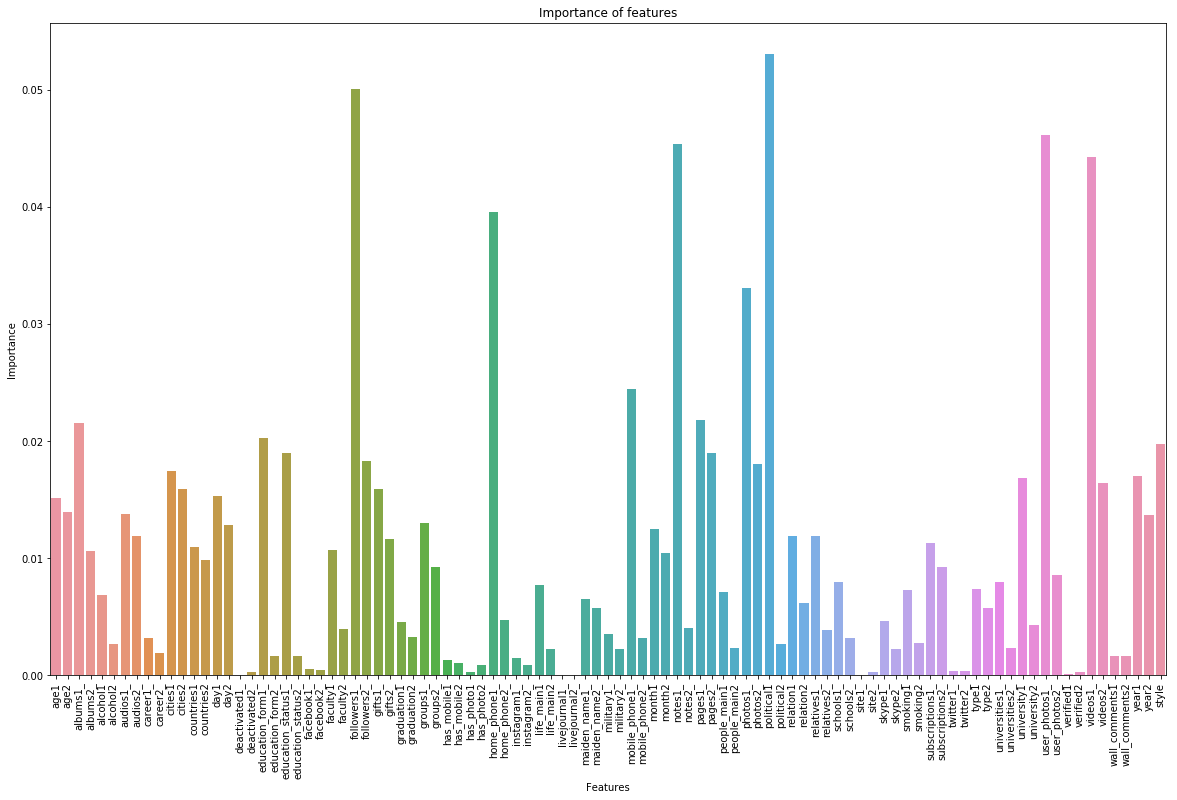

In [39]:
plt.figure(figsize=(20, 12))
barplot(new.drop('target', axis=1).columns, features)
plt.title('Importance of features')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.xticks(rotation=90)
plt.savefig("output.png", dpi=300)
plt.show()

In [23]:
# new = pd.read_pickle('new.csv')
# pd.to_pickle(new, 'new.csv')

In [33]:
names = ["Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA"]

In [34]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [35]:
new = new.sample(frac=1).reset_index(drop=True)
X = StandardScaler().fit_transform(new.drop('target', axis=1))
y = new['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

for name, clf in zip(names, classifiers):
    clf_ = clf
    clf_.fit(X_train, y_train)
    y_pred = clf_.predict(X_test)
    print(name, ': ', np.sum(y_pred == y_test) / len(y_test))

Decision Tree :  0.776083091607
Random Forest :  0.813948410842
Neural Net :  0.830448208103
AdaBoost :  0.810985309254
Naive Bayes :  0.705904369795


c:\program files\python36\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA :  0.583543869499
